In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from LearningAlgorithms import ClassificationAlgorithms
import seaborn as sns
import itertools
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# Plot settings
plt.style.use("fivethirtyeight")
plt.rcParams["figure.figsize"] = (20, 5)
plt.rcParams["figure.dpi"] = 100
plt.rcParams["lines.linewidth"] = 2

In [3]:
df = pd.read_pickle("../../data/interim/03_data_features.pkl")
df

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,participent,label,category,set,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,B,bench,heavy,64,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,1
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,B,bench,heavy,64,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,B,bench,heavy,64,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,B,bench,heavy,64,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,B,bench,heavy,64,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,E,row,medium,71,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,3
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,E,row,medium,71,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,0
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,E,row,medium,71,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,0


# Create a training and test set

In [4]:
df.columns

Index(['acc_x', 'acc_y', 'acc_z', 'gyr_x', 'gyr_y', 'gyr_z', 'participent',
       'label', 'category', 'set',
       ...
       'gyr_r_pse', 'gyr_r_freq_0.0_Hz_ws_14', 'gyr_r_freq_0.357_Hz_ws_14',
       'gyr_r_freq_0.714_Hz_ws_14', 'gyr_r_freq_1.071_Hz_ws_14',
       'gyr_r_freq_1.429_Hz_ws_14', 'gyr_r_freq_1.786_Hz_ws_14',
       'gyr_r_freq_2.143_Hz_ws_14', 'gyr_r_freq_2.5_Hz_ws_14', 'cluster'],
      dtype='object', length=121)

In [5]:
df_train = df.drop(["participent", "category", "set"], axis = 1)
df_train

,acc_x,acc_y,acc_z,gyr_x,gyr_y,gyr_z,label,duration,pca_1,pca_2,...,gyr_r_pse,gyr_r_freq_0.0_Hz_ws_14,gyr_r_freq_0.357_Hz_ws_14,gyr_r_freq_0.714_Hz_ws_14,gyr_r_freq_1.071_Hz_ws_14,gyr_r_freq_1.429_Hz_ws_14,gyr_r_freq_1.786_Hz_ws_14,gyr_r_freq_2.143_Hz_ws_14,gyr_r_freq_2.5_Hz_ws_14,cluster
epoch (ms),,,,,,,,,,,,,,,,,,,,,
2019-01-11 15:08:08.000,-0.172350,0.909033,-0.168556,-27.895242,-10.831760,26.285743,bench,16.0,-0.311963,-0.167364,...,0.404506,241.915837,-32.414519,17.800054,-7.090627,-23.559585,15.300362,-56.937517,-9.887314,1
2019-01-11 15:08:08.400,-0.024777,0.860474,-0.059254,-2.040040,-1.316930,1.986210,bench,16.0,-0.279209,-0.079385,...,0.376805,266.641927,-45.027971,-65.743054,-12.016695,8.716330,14.278175,5.797033,-2.207473,1
2019-01-11 15:08:08.800,-0.063378,0.997048,-0.033869,1.164754,-1.844231,-1.240332,bench,16.0,-0.328399,-0.066606,...,0.508919,262.078311,-56.234625,-30.091473,3.458370,-13.917311,-48.217504,42.767778,-11.602442,1
2019-01-11 15:08:09.200,-0.044993,0.971809,-0.038011,2.469483,-3.482648,3.563210,bench,16.0,-0.318289,-0.066734,...,0.492961,256.245567,-31.989318,69.348370,3.624009,17.424045,36.328368,26.990522,-9.999852,1
2019-01-11 15:08:09.600,-0.046925,0.911220,-0.056463,8.471911,4.745072,-8.708681,bench,16.0,-0.298084,-0.079820,...,0.363189,214.663711,-12.227055,13.687545,10.833066,6.326124,25.453064,-35.551747,-33.538487,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-20 17:33:26.200,0.063910,-0.952114,0.107673,-38.792016,8.810964,14.997831,row,19.0,0.349738,-0.028197,...,0.350704,368.429928,29.216316,-57.045603,10.239165,-47.609218,-37.827325,-17.620149,-36.551825,3
2019-01-20 17:33:26.600,-0.024266,-1.193314,-0.109309,-2.783290,-1.783932,6.232364,row,19.0,0.419648,-0.179453,...,0.324461,379.719977,39.879652,-21.517667,-13.542762,27.460451,82.477003,22.715838,9.757813,0
2019-01-20 17:33:27.000,-0.043276,-0.988153,-0.062545,2.032956,-4.019557,0.196986,row,19.0,0.349351,-0.148450,...,0.238607,319.521621,-34.907878,31.861740,9.784884,1.149502,-51.406834,-1.543486,0.948401,0


In [6]:
X = df_train.drop("label", axis=1)
y = df_train["label"]


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state = 42, stratify=y)


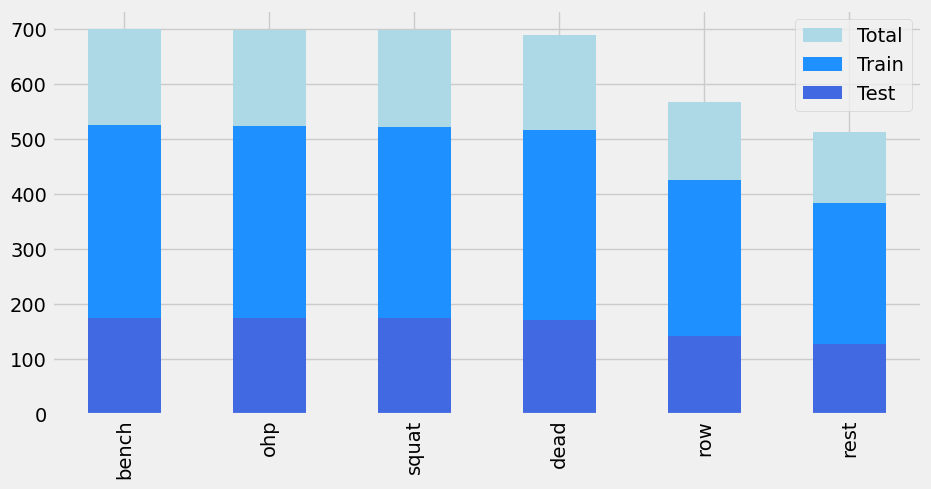

In [8]:
# visualize stratify 
fig, ax = plt.subplots(figsize=(10, 5))
df_train["label"].value_counts().plot(kind="bar", ax=ax, color="lightblue", label="Total")
y_train.value_counts().plot(kind="bar", ax=ax, color="dodgerblue", label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="royalblue", label="Test")
plt.legend()
plt.show()

# Split feature subsets

In [9]:
basic_features = ["acc_x", "acc_y", "acc_z", "gyr_x", "gyr_y", "gyr_z"]
square_features = ["acc_r", "gyr_r"]
pca_features = ["pca_1", "pca_2", "pca_3"]
time_features = [f for f in df_train.columns if "_temp_" in f]
freq_features = [f for f in df_train.columns if ("_freq" in f ) or ("_pse" in f)]
cluster_features = ["cluster"]

print("Basic features:", len(basic_features))
print("Square features:", len(square_features))
print("PCA features:", len(pca_features))
print("Time features:", len(time_features))
print("Frequency features:", len(freq_features))
print("Cluster features:", len(cluster_features))

Basic features: 6
Square features: 2
PCA features: 3
Time features: 16
Frequency features: 88
Cluster features: 1


In [10]:
feature_set_1 = list(set(basic_features))
feature_set_2 = list(set(basic_features + square_features + pca_features))
feature_set_3 = list(set(feature_set_2 + time_features))
feature_set_4 = list(set(feature_set_3 + freq_features + cluster_features))

# Perform forward feature selection using simple decision tree

In [11]:
learner = ClassificationAlgorithms()
max_features  = 10
selected_features, ordered_features, ordered_scores = learner.forward_selection(max_features, X_train, y_train)


0
1
2
3
4
5
6
7
8
9


In [12]:
selected_features

['pca_1',
 'duration',
 'acc_z_freq_0.0_Hz_ws_14',
 'acc_y_temp_mean_ws_5',
 'gyr_x_freq_1.071_Hz_ws_14',
 'gyr_x_max_freq',
 'gyr_x_temp_mean_ws_5',
 'gyr_z_max_freq',
 'acc_y_freq_weighted',
 'acc_r_freq_0.0_Hz_ws_14']

In [13]:
ordered_features

['pca_1',
 'duration',
 'acc_z_freq_0.0_Hz_ws_14',
 'acc_y_temp_mean_ws_5',
 'gyr_x_freq_1.071_Hz_ws_14',
 'gyr_x_max_freq',
 'gyr_x_temp_mean_ws_5',
 'gyr_z_max_freq',
 'acc_y_freq_weighted',
 'acc_r_freq_0.0_Hz_ws_14']

In [15]:
ordered_scores

[0.8876249569114099,
 0.9762150982419855,
 0.9982764563943468,
 0.9996552912788693,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

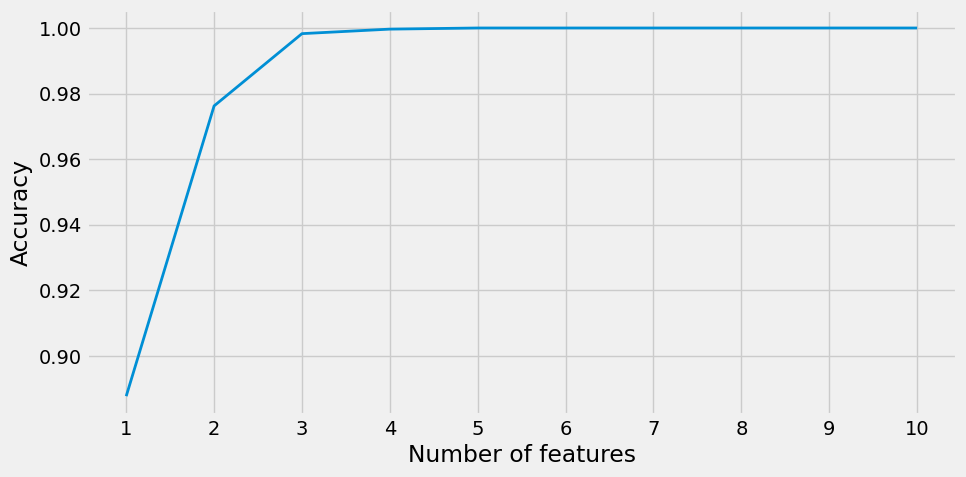

In [14]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(1, max_features + 1, 1), ordered_scores)
plt.xlabel("Number of features")
plt.ylabel("Accuracy")
plt.xticks(np.arange(1, max_features+1, 1))
plt.show()

# Grid search for best hyperparameters and model selection

In [17]:
possible_feature_sets = [feature_set_1, feature_set_2, feature_set_3, feature_set_4, selected_features]

feature_names = ["Feature Set 1", "Feature Set 2", "Feature Set 3", "Feature Set 4", "Selected Features"]

iterations = 1
score_df = pd.DataFrame()

In [18]:

for i, f in zip(range(len(possible_feature_sets)), feature_names):
    print("Feature set:", i)
    selected_train_X = X_train[possible_feature_sets[i]]
    selected_test_X = X_test[possible_feature_sets[i]]

    # First run non deterministic classifiers to average their score.
    performance_test_nn = 0
    performance_test_rf = 0

    for it in range(0, iterations):
        print("\tTraining neural network,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.feedforward_neural_network(
            selected_train_X,
            y_train,
            selected_test_X,
            gridsearch=False,
        )
        performance_test_nn += accuracy_score(y_test, class_test_y)

        print("\tTraining random forest,", it)
        (
            class_train_y,
            class_test_y,
            class_train_prob_y,
            class_test_prob_y,
        ) = learner.random_forest(
            selected_train_X, y_train, selected_test_X, gridsearch=True
        )
        performance_test_rf += accuracy_score(y_test, class_test_y)

    performance_test_nn = performance_test_nn / iterations
    performance_test_rf = performance_test_rf / iterations

    # And we run our deterministic classifiers:
    print("\tTraining KNN")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.k_nearest_neighbor(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_knn = accuracy_score(y_test, class_test_y)

    print("\tTraining decision tree")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.decision_tree(
        selected_train_X, y_train, selected_test_X, gridsearch=True
    )
    performance_test_dt = accuracy_score(y_test, class_test_y)

    print("\tTraining naive bayes")
    (
        class_train_y,
        class_test_y,
        class_train_prob_y,
        class_test_prob_y,
    ) = learner.naive_bayes(selected_train_X, y_train, selected_test_X)

    performance_test_nb = accuracy_score(y_test, class_test_y)

    # Save results to dataframe
    models = ["NN", "RF", "KNN", "DT", "NB"]
    new_scores = pd.DataFrame(
        {
            "model": models,
            "feature_set": f,
            "accuracy": [
                performance_test_nn,
                performance_test_rf,
                performance_test_knn,
                performance_test_dt,
                performance_test_nb,
            ],
        }
    )
    score_df = pd.concat([score_df, new_scores])

Feature set: 0
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 1
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 2
	Training neural network, 0
	Training random forest, 0
	Training KNN


/Users/jhsu12/opt/anaconda3/envs/tracking-barbell-exercises/lib/python3.8/site-packages/threadpoolctl.py:1186: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)


	Training decision tree
	Training naive bayes
Feature set: 3
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes
Feature set: 4
	Training neural network, 0
	Training random forest, 0
	Training KNN
	Training decision tree
	Training naive bayes


# Create a grouped bar plot to compare the results

In [20]:
score_df.sort_values(by="accuracy", ascending=False)

,model,feature_set,accuracy
1,RF,Selected Features,0.996898
1,RF,Feature Set 4,0.995863
0,NN,Feature Set 4,0.994829
0,NN,Feature Set 3,0.988625
3,DT,Selected Features,0.988625
1,RF,Feature Set 3,0.984488
3,DT,Feature Set 4,0.983454
2,KNN,Feature Set 4,0.968976
3,DT,Feature Set 3,0.960703
1,RF,Feature Set 1,0.960703


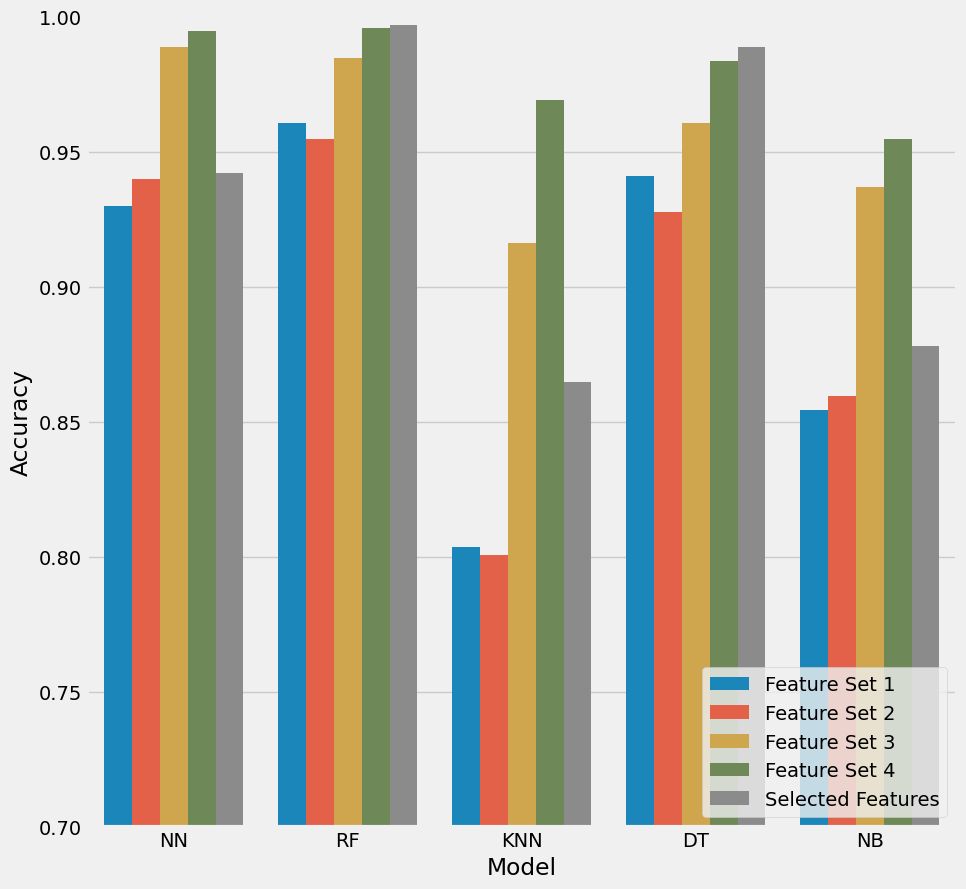

In [21]:
plt.figure(figsize=(10, 10))
sns.barplot(x="model", y="accuracy", hue="feature_set", data=score_df)
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1)
plt.legend(loc="lower right")
plt.show()

# Select best model and evaluate results

In [24]:
class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.random_forest(X_train[selected_features], y_train, X_test[selected_features], gridsearch=True)

In [26]:
accuracy = accuracy_score(y_test, class_test_y)
accuracy

0.9937952430196484

In [27]:
classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)
cm

array([[173,   0,   2,   0,   0,   0],
       [  0, 171,   0,   1,   0,   0],
       [  3,   0, 172,   0,   0,   0],
       [  0,   0,   0, 128,   0,   0],
       [  0,   0,   0,   0, 142,   0],
       [  0,   0,   0,   0,   0, 175]])

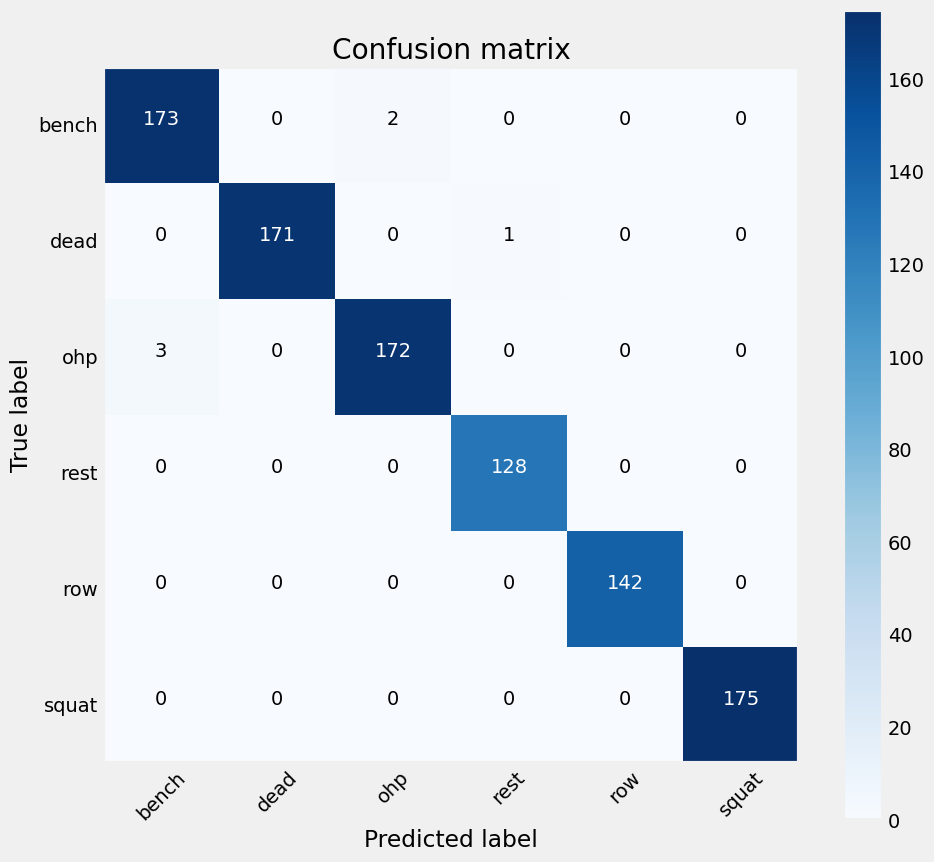

In [28]:
# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

# Select train and test data based on participant

In [32]:
participant_df = df.drop(["set", "category"], axis=1)
X_train = participant_df[participant_df["participent"] != "A"].drop("label", axis=1)
y_train = participant_df[participant_df["participent"] != "A"]["label"]

X_test = participant_df[participant_df["participent"] == "A"].drop("label", axis=1)
y_test = participant_df[participant_df["participent"] == "A"]["label"]

X_train = X_train.drop("participent", axis=1)
X_test = X_test.drop("participent", axis=1)


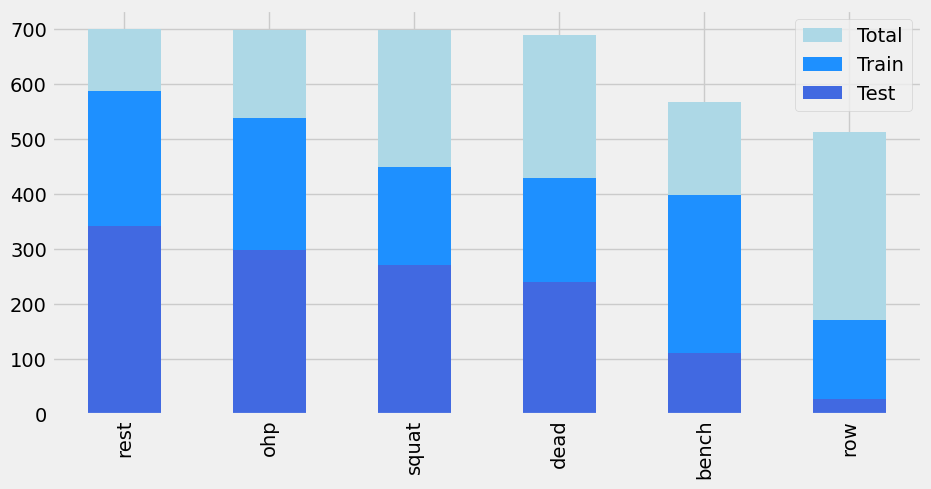

In [33]:
# visualize stratify 
fig, ax = plt.subplots(figsize=(10, 5))
df_train["label"].value_counts().plot(kind="bar", ax=ax, color="lightblue", label="Total")
y_train.value_counts().plot(kind="bar", ax=ax, color="dodgerblue", label="Train")
y_test.value_counts().plot(kind="bar", ax=ax, color="royalblue", label="Test")
plt.legend()
plt.show()

# Use best model again and evaluate results

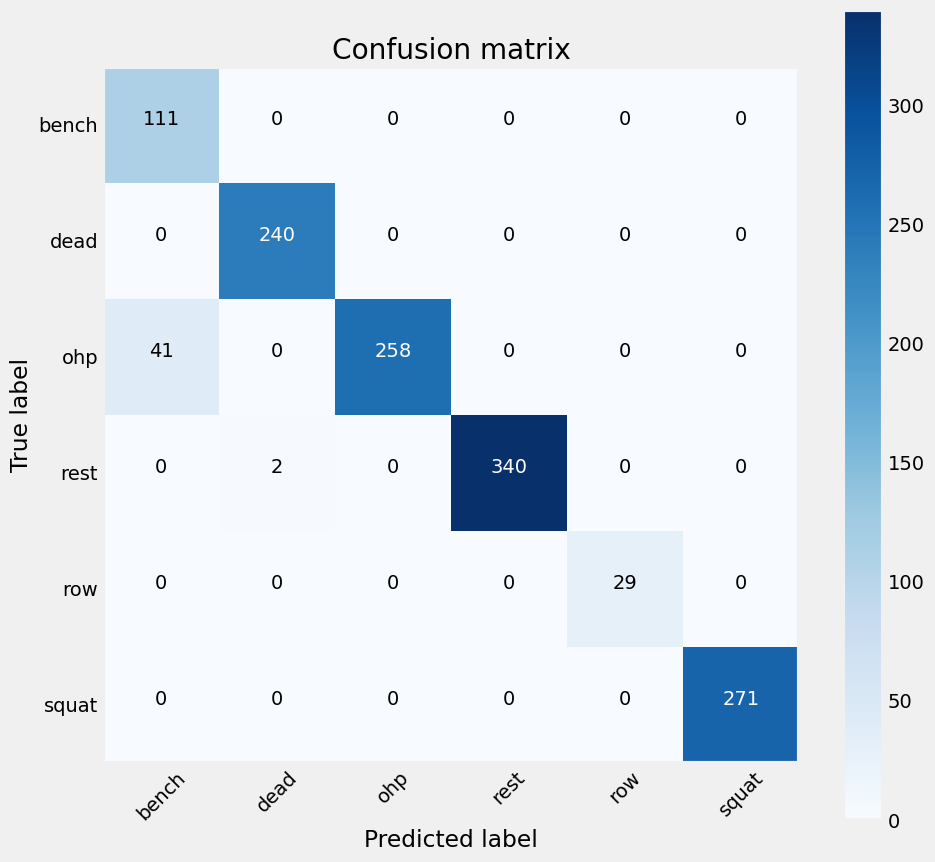

In [34]:
class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.random_forest(X_train[selected_features], y_train, X_test[selected_features], gridsearch=True)
accuracy = accuracy_score(y_test, class_test_y)
classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [35]:
accuracy

0.9667182662538699

# Try a simpler model with the selected features

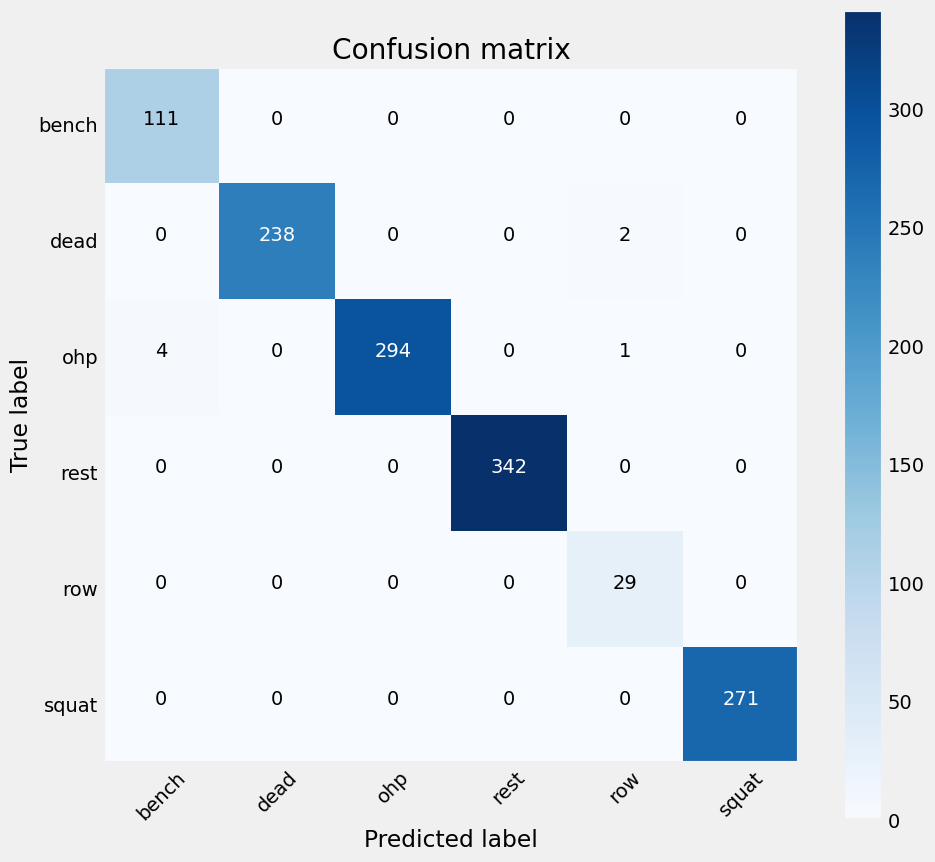

In [36]:
class_train_y, class_test_y, class_train_prob_y, class_test_prob_y = learner.feedforward_neural_network(X_train[feature_set_4], y_train, X_test[feature_set_4], gridsearch=False)
accuracy = accuracy_score(y_test, class_test_y)
classes = class_test_prob_y.columns
cm = confusion_matrix(y_test, class_test_y, labels=classes)

# create confusion matrix for cm
plt.figure(figsize=(10, 10))
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.title("Confusion matrix")
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

thresh = cm.max() / 2.0
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(
        j,
        i,
        format(cm[i, j]),
        horizontalalignment="center",
        color="white" if cm[i, j] > thresh else "black",
    )
plt.ylabel("True label")
plt.xlabel("Predicted label")
plt.grid(False)
plt.show()

In [37]:
accuracy

0.9945820433436533